IMPORT LIBRARY

In [2]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import sqlite3 as sql3
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
!pip install Sastrawi
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
   

CLEANSING DATA

In [3]:
conn = sql3.connect("abusive_text.db", check_same_thread=False)

# create stemmer
# def sastrawy(teks):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     teks   = stemmer.stem(teks)
#     return teks

# method untuk cleansing
# cleansing(teks):

def case_folding(teks):
    # proses cleansing
    # 1. jadikan teks agar lowercase
    teks = teks.lower()
    # 2. hanya menerima alfabet text
    teks = re.sub(r'[^a-zA-Z]',' ', teks)
    # 3. hapus kata user
    teks = teks.replace("user", "")
    # 4. menghapus whitespace di awal dan di akhir kalimat
    teks = teks.strip()
    # 5.hapus kata yg hanya terdiri dari 2 huruf atau kurang
    teks = teks.split()
    teks_normal = ''
    for str in teks:
        if(len(str) > 2):
            teks_normal = teks_normal + ' ' + str
    
    return teks_normal

# ubah kata alay menjadi kata baku
def normalization_alay(teks):
    df_alay = pd.read_sql_query('select * from ALAY', conn)
    dict_alay = dict(zip(df_alay['original'],df_alay['replacement']))
    teks = teks.split()
    teks_normal = ''
    for str in teks:
        if(bool(str in dict_alay)):
            teks_normal = teks_normal + ' ' + dict_alay[str]
        else:
            teks_normal = teks_normal + ' ' + str
    teks_normal = teks_normal.strip()
    return teks_normal

# hapus kata yg tidak bermakna
def stopword_remove(teks):
    stop_factory = StopWordRemoverFactory()
    data = stop_factory.get_stop_words()
    teks = teks.split()
    teks_normal = ''
    for str in teks:
        if(bool(str not in data)):
            teks_normal = teks_normal + ' ' + str
    return teks_normal

# # fungsi untuk sensor kata-kata abusive
# def normalization_abusive(teks):
#     df_abusive = pd.read_sql_query("select * from ABUSIVE", conn)
#     dict_abusive = dict(zip(df_abusive['teks'],df_abusive['teks']))
#     teks = teks.split()
#     teks_normal = ''
#     for str in teks:
#         if(bool(str in dict_abusive)):
#             str = removeVowels(str)
#             teks_normal = teks_normal + ' ' + str
#         else:
#             teks_normal = teks_normal + ' ' + str  
#     teks_normal = teks_normal.strip()
#     return teks_normal
   
def cleansing(teks):
    teks = case_folding(teks)
    teks = normalization_alay(teks)
    teks = stopword_remove(teks)
#     teks = normalization_abusive(teks)
    
    return teks


HAPUS DUPLIKAT

In [10]:
data = pd.read_csv('data.csv', encoding="latin-1")
data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
data.shape

(13169, 13)

In [12]:
data.duplicated().sum()

125

In [13]:
data = data.drop_duplicates()

In [14]:
data.duplicated().sum()

0

In [15]:
data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
data['New_Tweet'] = data['Tweet'].apply(cleansing) 
data

C:\Users\user\AppData\Local\Temp\ipykernel_36052\2203731565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['New_Tweet'] = data['Tweet'].apply(cleansing)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,New_Tweet
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,disaat semua cowok berusaha melacak perhatian...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,siapa telat ngasih tau elu edan sarap gue ber...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,kadang aku berfikir aku tetap percaya tuhan p...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,aku aku nku tau matamu sipit diliat mana aku
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kapir udah keliatan dongoknya awa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,jangan asal ngomong ndasmu congor sekate anjyng
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,kasur mana enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,hati hati bisu nlagi bosan huft xaa
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,bom real mudah terdeteksi bom terkubur suatu ...


KATA KATA YANG SERING MUNCUL BERDASARKAN DARI LEVEL HATE SPEECH

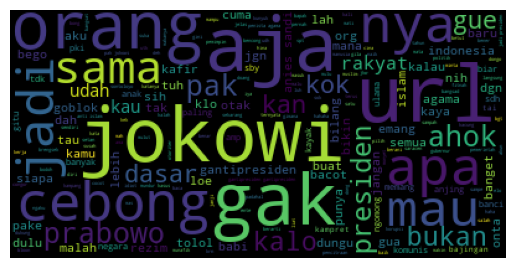

In [17]:
hs_weak = data.loc[data['HS_Weak'] == 1]
text = ' '.join(hs_weak['New_Tweet'])

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

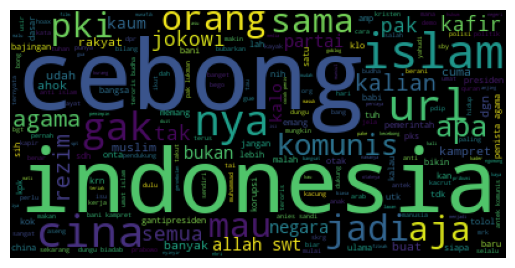

In [18]:
hs_moderate = data.loc[data['HS_Moderate'] == 1]
text = ' '.join(hs_moderate['New_Tweet'])

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

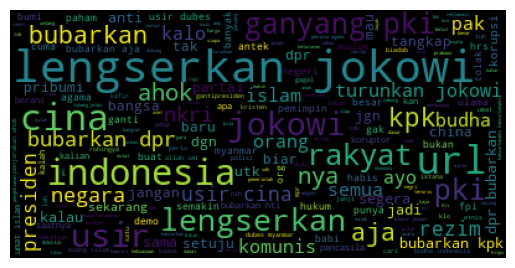

In [19]:
hs_strong = data.loc[data['HS_Strong'] == 1]
text = ' '.join(hs_strong['New_Tweet'])

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [20]:
# jumlah hs_weak
jweak = len(data[data['HS_Weak']==1])
# jumlah hs_moderate
jmoderate = len(data[data['HS_Moderate']==1])
# jumlah hs_strong
jstrong = len(data[data['HS_Strong']==1])

df_level = pd.DataFrame({'HS_Weak': jweak,
                   'HS_Moderate': jmoderate,
                   'HS_Strong': jstrong}, index=[0])

df_level

,HS_Weak,HS_Moderate,HS_Strong
0,3348,1698,472


KATA KATA YANG SERING MUNCUL BERDASARKAN DENGAN JENIS HATE SPEECH

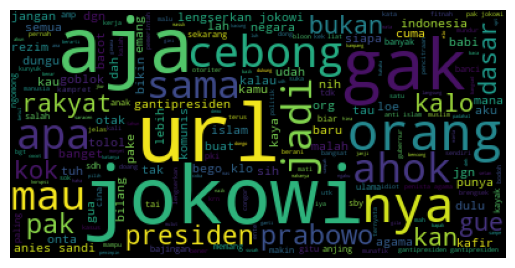

In [21]:
hs_individual = data.loc[data['HS_Individual'] == 1]
text = ' '.join(hs_individual['New_Tweet'])

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

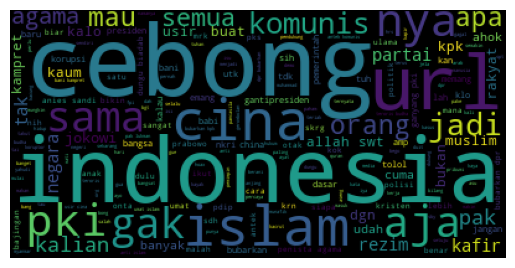

In [22]:
hs_group = data.loc[data['HS_Group'] == 1]
text = ' '.join(hs_group['New_Tweet'])

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

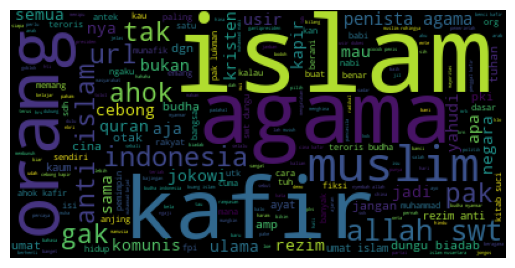

In [23]:
hs_religion = data.loc[data['HS_Religion'] == 1]
text = ' '.join(hs_religion['New_Tweet'])

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


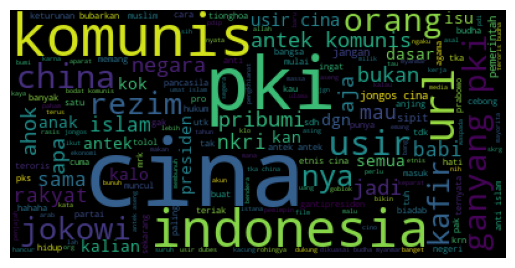

In [24]:
hs_race = data.loc[data['HS_Race'] == 1]
text = ' '.join(hs_race['New_Tweet'])

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

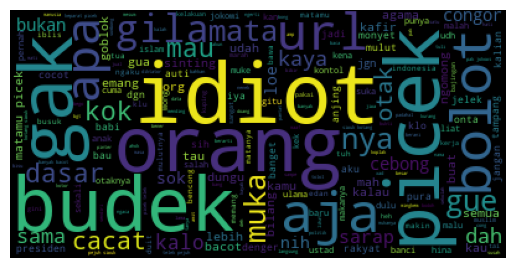

In [25]:
hs_physical = data.loc[data['HS_Physical'] == 1]
text = ' '.join(hs_physical['New_Tweet'])

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

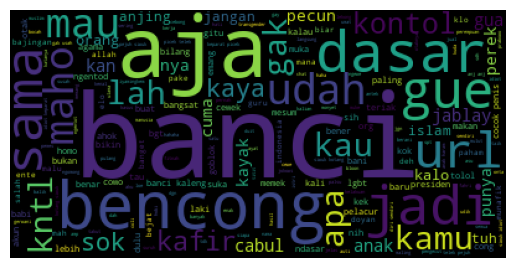

In [26]:
hs_gender = data.loc[data['HS_Gender'] == 1]
text = ' '.join(hs_gender['New_Tweet'])

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

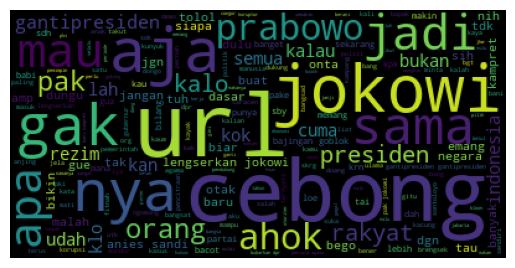

In [27]:
hs_other = data.loc[data['HS_Other'] == 1]
text = ' '.join(hs_other['New_Tweet'])

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [28]:
# # jumlah hs_weak
# jweak = len(df[df['HS_Weak']==1])
# # jumlah hs_moderate
# jmoderate = len(df[df['HS_Moderate']==1])
# # jumlah hs_strong
# jstrong = len(df[df['HS_Strong']==1])

data_kind = pd.DataFrame({'HS_Individual': len(data[data['HS_Individual']==1]),
                   'HS_Group': len(data[data['HS_Group']==1]),
                   'HS_Religion': len(data[data['HS_Religion']==1]),
                   'HS_Race': len(data[data['HS_Race']==1]),
                   'HS_Physical': len(data[data['HS_Physical']==1]),
                   'HS_Gender': len(data[data['HS_Gender']==1]),
                   'HS_Other': len(data[data['HS_Other']==1]),
                    }, index=[0])
data_kind

,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other
0,3540,1978,789,563,322,304,3706
